### Alternatives to the Markowitz Portfolio Problem

In [19]:
import sys
import numpy as np
import pandas as pd
import itertools
import  matplotlib.pyplot as plt
path='/home/jbohn/jupyter/personal/L1_Portfolio_Opt/'
sys.path.append(path)

from Features.features import load_features
from Split_Bregman.split_bregman_opt import split_bregman
from Split_Bregman.grid_search import grid_search
from Parameter_Estimation.bias_cov import reg_cov
from Parameter_Estimation.bias_mean import reg_mean


### Prep Data and Features

In [2]:
train_test_split=0.5
train_data, test_data = load_features(train_test_split)
train_data

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,WYNN,XEL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.628321,-1.285971,-0.811210,-2.432083,0.616121,0.176830,0.538743,1.631272,-0.538452,-0.596131,...,-0.207657,1.241682,-0.224387,0.041128,5.904149,-1.193047,-0.342566,-0.174548,3.116535,3.465148
2010-01-06,1.408218,0.045393,0.553813,-1.535767,1.057458,-0.531440,-0.253164,-0.212432,-0.235015,0.868174,...,-0.884311,3.193428,1.597067,0.379627,-1.320395,0.191851,-0.717461,-0.771667,-0.032304,8.338160
2010-01-07,0.071691,0.294622,0.825011,0.000000,-0.093539,-2.427090,-1.051132,-1.959530,-0.047069,-0.024706,...,2.123851,-0.710789,-0.295205,0.937728,2.113119,-0.432174,-0.028805,-2.531778,2.268103,10.616021
2010-01-08,0.702170,1.460205,0.509927,-2.044570,-0.398552,-0.822299,-1.256660,-0.543629,-0.141351,0.394477,...,2.103321,0.799284,-0.110934,1.169962,-0.719055,0.048113,0.028805,-0.325557,-2.122811,-1.631952
2010-01-11,-0.404037,-0.469430,0.507340,-1.839410,-0.094009,-0.091779,0.064831,-1.316890,0.446902,-0.989122,...,-0.640649,-0.621110,0.993936,0.420251,-0.324534,0.957398,1.713344,0.325557,2.185967,0.607538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.053927,0.303000,-0.043755,0.338579,-0.109443,0.591430,-0.112905,0.482834,0.082154,-0.597355,...,0.010458,-0.834438,-0.088298,-0.318574,-0.522166,2.232856,0.151239,0.319673,0.562442,-0.035058
2014-12-26,-0.420151,0.762348,0.327685,0.466928,-0.065722,0.343389,0.581993,-0.093701,-0.046938,-0.143644,...,0.677794,0.615528,-0.044178,0.042790,-0.351843,0.961420,0.479675,-0.294066,0.052565,0.140151
2014-12-29,0.270302,0.088268,-0.546748,-0.414938,-0.814182,-0.294259,-0.544341,-0.725811,-0.388069,0.759608,...,0.300925,0.021909,-0.331971,0.686111,1.733903,1.815025,0.572598,-0.064035,-0.588570,0.558660


In [3]:
cov=np.cov(train_data.T)
mean=np.mean(train_data,axis=0).values

biased_cov=reg_cov(train_data)
biased_mean=reg_mean(train_data,train_data.shape[0])


Solved via QP
- Minimum Variance Objective
- Mean Variance Objective
- Mean Variance Objective with Biased Estimators

Solved via Split Bregman
- Mean Variance Objective with Elastic Net Penalty
- Mean Variance Objective with Biased Estimators and Elastic Net Penalty

Solutions to each are for cross-validated optimal parameters for $\lambda_1$ and $\lambda_2$

Unit Box constraints allowing for shorts (-1,1)

In [4]:
lb,ub=-1,1
cutoff_threshold=0.01

lambda1_grid=np.geomspace(10e-6,1,5)
lambda2_grid=np.geomspace(10e-6,1,5)

# take all possible combinations of lambda1 and lambda2
params=[]
for i in itertools.product(lambda1_grid,lambda2_grid):
    params.append(i)

### Minimum Variance with Unbiased Sample Estimates

- $\lambda_1=\lambda_2=0$
- $\mu$=0

In [5]:
lambda1,lambda2=0,0
zero_mean=np.zeros(len(mean))
w_variance,w_variance_err,status_var=split_bregman(cov=cov,mean=zero_mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_variance

Total Cost: 0.09828983037933256
Total Cost: 0.0982898303773318
Total Cost: 0.09828983037733202
Total Cost: 0.09828983037733181
Total Cost: 0.09828983037733191
Total Cost: 0.09828983037733177
Total Cost: 0.09828983037733194
Total Cost: 0.09828983037733204
Total Cost: 0.09828983037733192
Total Cost: 0.09828983037733202
Total Cost: 0.09828983037733192
Total Cost: 0.09828983037733183
Total Cost: 0.09828983037733184
Total Cost: 0.098289830377332
Total Cost: 0.09828983037733194
Total Cost: 0.09828983037733195
Total Cost: 0.09828983037733202
Total Cost: 0.09828983037733183
Total Cost: 0.09828983037733197
Total Cost: 0.09828983037733208
Total Cost: 0.09828983037733191
Total Cost: 0.0982898303773319
Total Cost: 0.0982898303773319
Total Cost: 0.09828983037733191
Total Cost: 0.09828983037733187
Total Cost: 0.098289830377332
MaxIter Achieved


array([ 1.49124617e-04,  6.29144104e-04, -2.19474468e-03, -3.62904225e-04,
       -7.43582097e-04, -6.97619260e-04, -2.56335437e-03,  2.10015837e-03,
       -4.76088659e-03,  9.05656864e-05, -2.46926658e-03, -1.79441503e-03,
       -6.93535701e-03,  1.00514173e-03, -9.06029931e-04, -2.87752924e-03,
        1.03867027e-03, -1.80825390e-03, -2.99680624e-04, -9.40827412e-03,
        1.86248628e-03, -2.97872437e-02,  3.11523390e-02, -4.33521657e-04,
        5.68291545e-04,  2.87092202e-04, -1.86789810e-03, -4.79158704e-04,
       -7.01934345e-03, -2.44154361e-03,  9.89736932e-05, -5.73872094e-03,
        4.35318158e-03, -3.31663853e-03,  4.04442478e-03, -2.44238035e-03,
       -5.34918119e-03, -4.12693771e-03, -3.12040080e-03,  4.49907267e-03,
        9.18815970e-04, -3.37539045e-04,  5.95319525e-04,  2.12240436e-03,
        8.57074971e-03,  2.26410655e-03,  2.66136073e-03,  4.80889395e-03,
       -1.54369211e-03, -1.24405264e-03,  4.56684844e-03,  3.11788312e-03,
        1.14212048e-03,  

Text(0, 0.5, 'Weight')

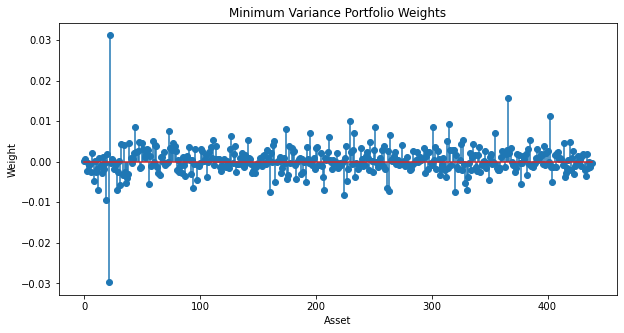

In [6]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Minimum Variance Portfolio Weights")
ax.stem(w_variance)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Mean Variance with Unbiased Sample Estimates

-$\lambda_1=\lambda_2=0$

In [7]:
lambda1,lambda2=0,0
w_mean_variance,w_mean_variance_err,status=split_bregman(cov=cov,mean=mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_mean_variance

Total Cost: 0.083207426319161
Total Cost: 0.08320742631428019
Total Cost: 0.08320742631427946
Total Cost: 0.08320742631427941
Total Cost: 0.08320742631427913
Total Cost: 0.08320742631427924
Total Cost: 0.08320742631427958
Total Cost: 0.08320742631427969
Total Cost: 0.08320742631427924
Total Cost: 0.08320742631428002
Total Cost: 0.08320742631427935
Total Cost: 0.08320742631427941
Total Cost: 0.08320742631427958
Total Cost: 0.08320742631427935
Total Cost: 0.0832074263142798
Total Cost: 0.08320742631427902
Total Cost: 0.08320742631427819
Total Cost: 0.08320742631427985
Total Cost: 0.08320742631427924
Total Cost: 0.08320742631427913
Total Cost: 0.08320742631427952
Total Cost: 0.0832074263142793
Total Cost: 0.08320742631427969
Total Cost: 0.0832074263142793
Total Cost: 0.08320742631427896
Total Cost: 0.08320742631427963
MaxIter Achieved


array([ 3.85782737e-03,  4.08604328e-03, -4.01674847e-03, -2.69797726e-04,
       -2.31535344e-04, -1.83595181e-03, -3.60788312e-03,  1.88584110e-04,
        1.85402569e-03,  2.33655824e-04, -4.57006666e-03, -1.94348690e-03,
       -4.59769438e-03,  2.76297079e-03, -5.96214201e-04, -4.39427325e-04,
       -1.09511503e-03, -4.48603992e-03, -1.35791058e-03, -4.62249992e-03,
        4.68952810e-03, -1.58309815e-02,  1.31577530e-02, -1.79186806e-04,
       -1.36937379e-03, -2.04036415e-03, -4.70614203e-03,  5.86755496e-04,
        5.96359902e-04, -4.04332006e-03, -4.01561084e-04, -3.48460876e-03,
        3.18440984e-03,  2.01068588e-03,  2.93006261e-03, -2.74526853e-04,
       -3.86026924e-03, -1.72081259e-03, -3.22266195e-03,  1.08382954e-03,
        3.53032288e-03, -1.12967255e-03,  3.71078018e-03, -1.46464404e-03,
        9.67233608e-03, -2.81173122e-03,  2.09185426e-03,  7.06373345e-03,
       -3.61034333e-03, -2.54696611e-03,  2.65536009e-03,  2.40403236e-03,
       -2.19641393e-04,  

Text(0, 0.5, 'Weight')

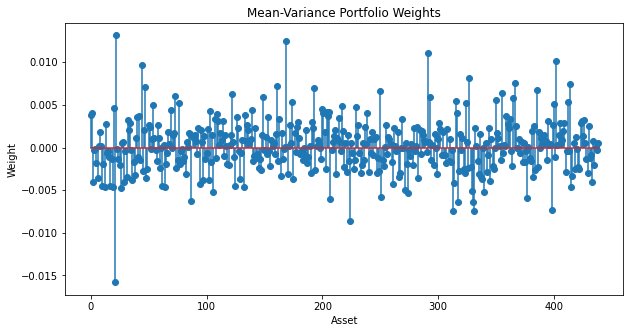

In [8]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Mean-Variance Portfolio Weights")
ax.stem(w_mean_variance)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Mean Variance with Biased Estimators 

-$\lambda_1=\lambda_2=0$

- $\mu \rightarrow{} \hat{\mu}$
- $\Sigma\rightarrow{} \rho \hat{\Sigma}+(1-\rho)I$

In [9]:
lambda1,lambda2=0,0
w_mean_variance_bias,w_mean_variance_bias_err,status_mv_bias=split_bregman(cov=biased_cov,mean=biased_mean,lambda1=lambda1,lambda2=lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)
w_mean_variance_bias

Total Cost: 0.07040564682798767
Total Cost: 0.07040564682773565
Total Cost: 0.0704056468277357
Total Cost: 0.07040564682773565
Total Cost: 0.0704056468277357
Total Cost: 0.0704056468277357
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773567
Total Cost: 0.0704056468277357
Total Cost: 0.0704056468277357
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773565
Total Cost: 0.07040564682773576
Total Cost: 0.07040564682773573
Total Cost: 0.07040564682773565
Total Cost: 0.07040564682773576
Total Cost: 0.0704056468277357
Total Cost: 0.07040564682773565
Total Cost: 0.07040564682773565
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773576
Total Cost: 0.0704056468277357
Total Cost: 0.07040564682773567
Total Cost: 0.07040564682773573
MaxIter Achieved


array([ 2.95708384e-03,  3.37481269e-03,  1.41016529e-03,  1.07560651e-04,
        1.83856965e-03,  6.51438506e-04, -2.13736976e-03, -7.91411919e-04,
        2.53804963e-03,  3.14484193e-03, -6.26232043e-03, -4.22821367e-03,
       -3.03831133e-03,  3.05164989e-04, -5.11109033e-04,  1.73817709e-03,
       -2.89878023e-03, -4.36370284e-03, -7.32568578e-05,  1.81717364e-03,
        3.25404499e-03, -8.00095333e-04, -8.25933643e-04,  9.32916257e-03,
       -1.21516474e-03, -4.46174178e-03, -9.55408024e-04,  1.04630128e-03,
        2.28592776e-03, -1.35733185e-03, -1.31062613e-03,  2.16712190e-05,
        6.39949692e-03,  1.40193314e-04,  6.65862184e-03,  1.27262012e-03,
       -5.48144782e-05, -3.53694085e-04, -3.48016209e-04, -8.07949527e-04,
        3.05544119e-03, -4.04904161e-03,  6.96199471e-03, -3.97963095e-04,
        1.05808649e-02,  1.48962699e-03,  2.30457820e-03, -4.39819028e-04,
        1.77754169e-05, -1.64810445e-03,  1.37341738e-02,  1.88137954e-03,
       -2.32451186e-03, -

Text(0, 0.5, 'Weight')

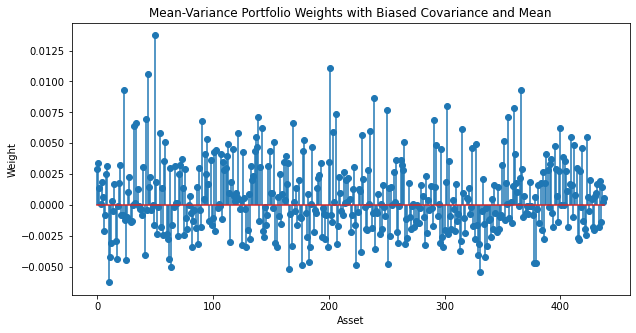

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Mean-Variance Portfolio Weights with Biased Covariance and Mean")
ax.stem(w_mean_variance_bias)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Elastic Net Penalty Unbiased Sample Estimates 

In [11]:
sorted_dict=grid_search(params,mean,cov,tol=10e-6,maxiter=25)
optimal_lambda1,optimal_lambda2=sorted_dict[0][0]

 lambda1: 1e-05 lambda2: 1e-05 error: 0.083284
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.08339463
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.085598
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.08445957
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.08456844
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.08675899
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.10536438
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.10544206
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.10740448
QP Optimization f

In [12]:
print(f" Optimal lambda1: {optimal_lambda1} Optimal lambda2: {optimal_lambda2} with error: {sorted_dict[0][1][1]}")
w_sb_unbias,w_sb_unbias_err,status_sb_unbias=split_bregman(cov=cov,mean=mean,lambda1=optimal_lambda1,lambda2=optimal_lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 1e-05 with error: 0.08328400331373369
Total Cost: 0.08328162684357882
Total Cost: 0.08328172163442628
Total Cost: 0.08328181645215184
Total Cost: 0.0832819112918886
Total Cost: 0.08328200615362605
Total Cost: 0.08328210103735433
Total Cost: 0.08328219594306333
Total Cost: 0.08328229087074096
Total Cost: 0.08328238582037722
Total Cost: 0.08328248079196197
Total Cost: 0.08328257578548462
Total Cost: 0.0832826708009346
Total Cost: 0.08328276583830221
Total Cost: 0.08328286089757525
Total Cost: 0.08328295597874379
Total Cost: 0.08328305108179766
Total Cost: 0.08328314620672728
Total Cost: 0.08328324135352125
Total Cost: 0.08328333652216834
Total Cost: 0.08328343171265996
Total Cost: 0.08328352692498311
Total Cost: 0.08328362215912957
Total Cost: 0.08328371741508835
Total Cost: 0.08328381269284967
Total Cost: 0.08328390799240017
Total Cost: 0.08328400331373341
MaxIter Achieved


Text(0, 0.5, 'Weight')

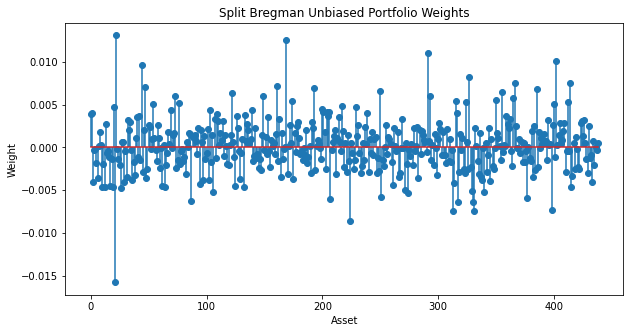

In [13]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Unbiased Portfolio Weights")
ax.stem(w_sb_unbias)

ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Elastic Net Penalty with Biased Estimates

In [15]:
bias_sorted_dict=grid_search(params,biased_mean,biased_cov,tol=10e-6,maxiter=25)
optimal_bias_lambda1,optimal_bias_lambda2=bias_sorted_dict[0][0]

 lambda1: 1e-05 lambda2: 1e-05 error: 0.07042509
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.07043155
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.0705467
 lambda1: 1e-05 lambda2: 0.05623413 error: 0.07269067
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.07074496
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.07075143
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.07086663
 lambda1: 0.00017783 lambda2: 0.05623413 error: 0.07301176
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.07643318
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.0764397
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.07655598
 lambda1: 0.00316228 lambda2: 0.05623413 error: 0.0787218
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.0031622776601683794

In [16]:
print(f" Optimal lambda1: {optimal_bias_lambda1} Optimal lambda2: {optimal_bias_lambda2} with error: {bias_sorted_dict[0][1][1]}")
w_sb_bias,w_sb_bias_err,status_sb_bias=split_bregman(cov=biased_cov,mean=biased_mean,lambda1=optimal_bias_lambda1,lambda2=optimal_bias_lambda2,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 1e-05 with error: 0.07042509116837742
Total Cost: 0.07042499535815104
Total Cost: 0.07042499919024442
Total Cost: 0.0704250030225972
Total Cost: 0.07042500685495613
Total Cost: 0.07042501068732107
Total Cost: 0.07042501451969196
Total Cost: 0.07042501835206902
Total Cost: 0.07042502218445183
Total Cost: 0.07042502601684102
Total Cost: 0.07042502984923601
Total Cost: 0.07042503368163705
Total Cost: 0.07042503751404426
Total Cost: 0.07042504134645744
Total Cost: 0.07042504517887671
Total Cost: 0.07042504901130188
Total Cost: 0.07042505284373314
Total Cost: 0.07042505667617044
Total Cost: 0.07042506050861373
Total Cost: 0.07042506434106309
Total Cost: 0.07042506817351851
Total Cost: 0.07042507200597982
Total Cost: 0.07042507583844727
Total Cost: 0.07042507967092088
Total Cost: 0.07042508350340033
Total Cost: 0.07042508733588587
Total Cost: 0.07042509116837734
MaxIter Achieved


Text(0, 0.5, 'Weight')

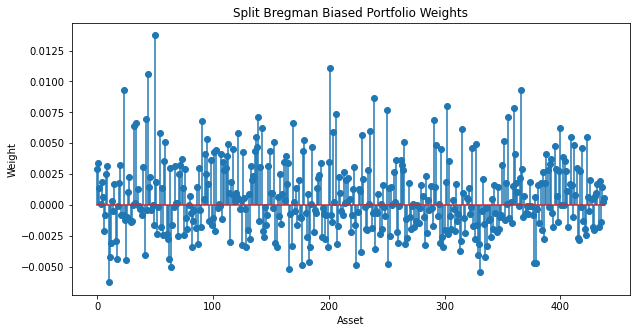

In [17]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Biased Portfolio Weights")
ax.stem(w_sb_bias)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")


In [24]:
test_data.T/100

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
MMM,-0.001584,-0.022811,-0.010721,0.007223,0.023685,-0.012360,-0.005460,-0.000747,-0.004868,-0.001127,...,-0.004814,-0.005310,0.018290,0.018532,0.017523,-0.010080,-0.000510,0.003787,-0.008100,0.003350
AOS,-0.007116,-0.017652,-0.008211,0.007302,0.025677,-0.016083,0.003955,-0.004316,-0.002526,-0.020442,...,0.013334,0.006813,0.004657,0.001477,-0.005922,0.007608,0.005040,0.001465,-0.005033,0.001470
ABT,-0.002669,0.000223,-0.011421,0.008075,0.020346,-0.010563,0.008372,-0.021511,-0.007425,-0.007480,...,0.007610,-0.001494,0.004820,-0.007931,0.007931,-0.000802,0.000000,0.001374,-0.006889,0.000691
ABMD,-0.019902,-0.006453,-0.025684,0.031333,0.044078,-0.014218,0.003898,0.006462,-0.014534,-0.030257,...,0.014751,-0.010788,-0.043766,-0.039365,0.045308,0.010854,-0.007515,-0.010227,-0.011766,0.019534
ACN,-0.005276,-0.017028,-0.007239,0.020772,0.015134,-0.001113,-0.003012,0.003569,-0.011758,-0.006895,...,-0.007836,0.011536,0.012269,0.013353,-0.001280,0.003693,0.002077,0.000801,-0.007473,-0.000332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XEL,0.005553,-0.011416,0.005307,0.008598,0.011532,-0.012361,-0.008884,0.008055,0.008813,0.008736,...,0.006799,0.005187,0.000940,0.004688,-0.017772,-0.002542,-0.001114,0.005242,0.002690,0.003155
YUM,-0.006887,-0.020527,-0.012350,0.032601,0.017270,-0.001768,-0.007515,-0.004123,-0.004140,-0.011965,...,-0.012668,-0.008873,0.010878,0.007684,-0.007784,0.005196,0.014447,0.001080,-0.012442,0.000894
ZBRA,0.000258,-0.014177,-0.007231,0.025146,0.021134,0.014508,0.001489,0.023040,-0.015998,0.000615,...,-0.007900,0.007821,-0.009045,-0.002532,0.016653,-0.009392,0.000354,0.006191,-0.007410,0.005220
ZBH,-0.007345,0.036625,-0.008513,0.024566,0.010561,-0.014529,0.002366,0.002192,-0.013309,-0.018953,...,-0.000934,-0.006561,-0.000537,0.010163,0.006102,-0.002449,-0.003785,-0.001931,-0.008435,0.006233


Text(0, 0.5, 'Cumulative Returns')

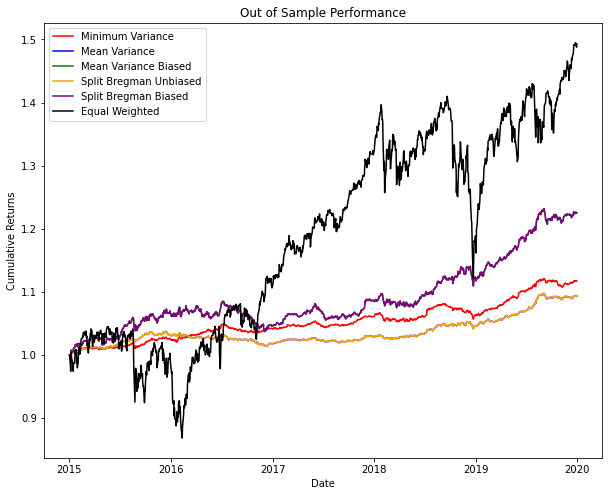

In [38]:
cum_returns_1=np.cumprod(1+np.dot(w_variance,test_data.T/100))
cum_returns_2=np.cumprod(1+np.dot(w_mean_variance,test_data.T/100))
cum_returns_3=np.cumprod(1+np.dot(w_mean_variance_bias,test_data.T/100))
cum_returns_4=np.cumprod(1+np.dot(w_sb_unbias,test_data.T/100))
cum_returns_5=np.cumprod(1+np.dot(w_sb_bias,test_data.T/100))

cum_returns_equal=np.cumprod(1+np.dot(np.ones(len(mean))/len(mean),test_data.T/100))


fig,ax=plt.subplots(figsize=(10,8))
plt.title("Out of Sample Performance")
plt.plot(pd.to_datetime(test_data.index),cum_returns_1,label='Minimum Variance',color='red')
plt.plot(pd.to_datetime(test_data.index),cum_returns_2,label='Mean Variance',color='blue')
plt.plot(pd.to_datetime(test_data.index),cum_returns_3,label='Mean Variance Biased',color='green')
plt.plot(pd.to_datetime(test_data.index),cum_returns_4,label='Split Bregman Unbiased',color='orange')
plt.plot(pd.to_datetime(test_data.index),cum_returns_5,label='Split Bregman Biased',color='purple')
plt.plot(pd.to_datetime(test_data.index),cum_returns_equal,label='Equal Weighted',color='black')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")


In [33]:
def get_sharpe(port_returns,rf=0.025):
    de_meaned_returns=port_returns-1
    
    sd=np.std(de_meaned_returns-rf)
    mu=np.mean(de_meaned_returns)
    
    sharpe=(mu-rf)/sd
    
    return sharpe

In [34]:
sharpe_1=get_sharpe(cum_returns_1)
sharpe_2=get_sharpe(cum_returns_2)
sharpe_3=get_sharpe(cum_returns_3)
sharpe_4=get_sharpe(cum_returns_4)
sharpe_5=get_sharpe(cum_returns_5)
sharpe_equal=get_sharpe(cum_returns_equal)

print(f"Minimum Variance Sharpe: {sharpe_1}")
print(f"Mean Variance Sharpe: {sharpe_2}")
print(f"Mean Variance Biased Sharpe: {sharpe_3}")

print(f"Split Bregman Unbiased Sharpe: {sharpe_4}")
print(f"Split Bregman Biased Sharpe: {sharpe_5}")
print(f"Equal Weighted Sharpe: {sharpe_equal}")


Minimum Variance Sharpe: 0.9223324771266782
Mean Variance Sharpe: 0.4933795258191971
Mean Variance Biased Sharpe: 1.1883778513985916
Split Bregman Unbiased Sharpe: 0.49352126237390087
Split Bregman Biased Sharpe: 1.188377081942387
Equal Weighted Sharpe: 1.0312661458734798
